In [12]:
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import openpyxl
import xlsxwriter
import os
from matplotlib.backends.backend_pdf import PdfPages
from reportlab.lib.pagesizes import letter, A4, landscape
from reportlab.pdfgen import canvas
from reportlab.platypus import SimpleDocTemplate, Table, TableStyle, PageBreak, Paragraph
from reportlab.lib import colors
from reportlab.platypus import Table as RLTable, TableStyle
from reportlab.platypus import Paragraph, Spacer
from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle
from reportlab.lib.units import inch
from PyPDF2 import PdfReader, PdfWriter
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
filepath = 'BOH2\\Audit\\November 1\\data.xlsx'
data = pd.read_excel(filepath)
data.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,RecipientFirstName,RecipientEmail,ExternalReference,LocationLatitude,LocationLongitude,DistributionChannel,UserLanguage,Name,Name other,Date,First name,Second name,Student ID,DRN Pt 1,1. ID Match,1. Medical History,1.Allergies and ADRs,1. Presenting reason,1. General history,1. Rads Diagnostics,1. Other tests,1. Diagnosis,1.Treatment plan,1. Informed consent,1. Fees discussed,1. Periodontal,1. Treatment details,1. Drugs prescribed,1.Drugs administered,1. Handover,1. Terminology,1. Language,1. Referrals,1. Tracking,1. Scope of practice,1. Comments,DRN Pt 2,2. ID Match,2. Medical history,2. Allergies,2. Presenting reason,2. General history,2. Rads diagnostics,2. Other diagnostics,2. Diagnosis,2. Treatment plan,2. Consent,2. Fees,2. Periodontics,2. Treatment details,2. Drugs prescribed,2. Drugs admin,2. Handover,2. Terminology,2. Language,2. Referral,2. Tracking,2. Scope of practice,2. Comments,DRN Pt 3,3. ID Match,3. Medical history,3. Allergies,3. Presenting reason,3. History,2. Rads diagnostics.1,3. Other diagnostics,3. Diagnosis,3. Treatment Plan,3. Informed consent,3. Fees,3. Periodontics,3. Treatment details,3. Drugs prescribed,3.Drugs administered,3. Handover,3. Terminology,3. Language,3. Referrals,3. Tracking,3. Scope of Practice,3. Comments,Future assessments,Signature_Id,Signature_Name,Signature_Size,Signature_Type,fname,gname,uomid,check
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,Recipient First Name,Recipient Email,External Data Reference,Location Latitude,Location Longitude,Distribution Channel,User Language,Assessor's Name,"If other, please provide",Date,Student Given Name,Student Family Name,Student ID,DRN Number 1,Patient identification conducted and documente...,Medical history assessment documented,Allergies and ADRs documented,Presenting reason documented,"Complete History, Examination and Updated Char...",Radiographic Diagnostic Tests/ Investigations ...,Other Diagnostic Tests/ Investigations Documented,Diagnosis Documented,Treatment Planning Documented,Evidence of informed Consent Documented,Fees Estimate Provided/ Discussed and Documented,Periodontal Condition Documented,"Treatment Details Documented – tooth number, s...","Drugs Prescribed Documented – name, quantity, ...","Drugs administered – name, concentration dose,...",Clinical handover dcoumented,Standard abbreviations used,Objective comments used,Referral Documentation and Appropriate Follow-...,Instrument Tracking Documented,Working within the Defined Scope of Clinical P...,Additional comments and notes,DRN Number 1,Patient identification conducted and documente...,2. Medical history assessment documented,3. Allergies and ADRs documented,4. Presenting reason documented,"5. Complete History, Examination and Updated C...",6. Radiographic Diagnostic Tests/ Investigatio...,7. Other Diagnostic Tests/ Investigations Docu...,8. Diagnosis Documented,9. Treatment Planning Documented,10. Evidence of informed Consent Dcoumented,11. Fees Estimate Provided/ Discussed and Docu...,12. Periodontal Condition Documented,14. Treatment Details Documented – tooth numbe...,"15. Drugs Prescribed Documented – name, quanti...","16. Drugs administered – name, concentration d...",17. Clinical handover dcoumented,18. Standard abbreviations used,19. Objective comments used,20. Referral Documentation and Appropriate Fol...,21. Instrument Tracking Documented,22. Working within the Defined Scope of Clinic...,Additional comments and notes,DRN Number 1,1. Patient identification conducted and docume...,2. Medical history assessment documented,3. Allergies and ADRs documented,4. Presenting reason documented,"5. Complete History, Examination and Updated C...",6. Radiographic Diagnostic Tests/ Investigatio...,7. Other Diagnostic Tests/ Investigations Docu...,8. Diagnosis Documented,9

In [13]:
df = data.copy()
df.columns = df.iloc[0]
df = df[1:]
# Reset the index
df.reset_index(drop=True, inplace=True)
df.head()

,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,Recipient First Name,Recipient Email,External Data Reference,Location Latitude,Location Longitude,Distribution Channel,User Language,Assessor's Name,"If other, please provide",Date,Student Given Name,Student Family Name,Student ID,DRN Number 1,Patient identification conducted and documented (using 3 unique identifiers),Medical history assessment documented,Allergies and ADRs documented,Presenting reason documented,"Complete History, Examination and Updated Charting Documented",Radiographic Diagnostic Tests/ Investigations Documented,Other Diagnostic Tests/ Investigations Documented,Diagnosis Documented,Treatment Planning Documented,Evidence of informed Consent Documented,Fees Estimate Provided/ Discussed and Documented,Periodontal Condition Documented,"Treatment Details Documented – tooth number, surface areas and materials","Drugs Prescribed Documented – name, quantity, dose and instructions","Drugs administered – name, concentration dose, anatomical site",Clinical handover dcoumented,Standard abbreviations used,Objective comments used,Referral Documentation and Appropriate Follow-up Documented,Instrument Tracking Documented,Working within the Defined Scope of Clinical Practice Evidenced,Additional comments and notes,DRN Number 1,Patient identification conducted and documented (using 3 unique identifiers),2. Medical history assessment documented,3. Allergies and ADRs documented,4. Presenting reason documented,"5. Complete History, Examination and Updated Charting Documented",6. Radiographic Diagnostic Tests/ Investigations Documented,7. Other Diagnostic Tests/ Investigations Documented,8. Diagnosis Documented,9. Treatment Planning Documented,10. Evidence of informed Consent Dcoumented,11. Fees Estimate Provided/ Discussed and Documented,12. Periodontal Condition Documented,"14. Treatment Details Documented – tooth number, surface areas and materials","15. Drugs Prescribed Documented – name, quantity, dose and instructions","16. Drugs administered – name, concentration dose, anatomical site",17. Clinical handover dcoumented,18. Standard abbreviations used,19. Objective comments used,20. Referral Documentation and Appropriate Follow-up Documented,21. Instrument Tracking Documented,22. Working within the Defined Scope of Clinical Practice Evidenced,Additional comments and notes,DRN Number 1,1. Patient identification conducted and documented (using 3 unique identifiers),2. Medical history assessment documented,3. Allergies and ADRs documented,4. Presenting reason documented,"5. Complete History, Examination and Updated Charting Documented",6. Radiographic Diagnostic Tests/ Investigations Documented,7. Other Diagnostic Tests/ Investigations Documented,8. Diagnosis Documented,9. Treatment Planning Documented,10. Evidence of informed Consent Dcoumented,11. Fees Estimate Provided/ Discussed and Documented,12. Periodontal Condition Documented,"14. Treatment Details Documented – tooth number, surface areas and materials","15. Drugs Prescribed Documented – name, quantity, dose and instructions","16. Drugs administered – name, concentration dose, anatomical site",17. Clinical handover dcoumented,18. Standard abbreviations used,19. Objective comments used,20. Referral Documentation and Appropriate Follow-up Documented,21. Instrument Tracking Documented,22. Working within the Defined Scope of Clinical Practice Evidenced,Additional comments and notes,Internal comments for future assessments,Assessor signature - Id,Assessor signature - Name,Assessor signature - Size,Assessor signature - Type,fname,gname,uomid,check
0,2024-11-03 21:29:35,2024-11-03 22:00:36,IP Address,61.69.124.49,100,1861,True,2024-11-03 22:00:37,R_4fCbUSNGRwNdB9C,NaN,NaN,NaN,NaN,-37.8024,144.9659,anonymous,EN,Other,Elise Vo,3 Nov 2024,Dina,Qattan,1472336,568807,Yes,Yes,Yes,Yes,Yes,NaN,No,No,No,Yes,No,Yes,Yes,NaN,NaN,Yes,Yes,Yes,Yes,Yes,Yes,Trea

In [14]:
for i, cols in enumerate(df.columns):
    print(i, cols)

0 Start Date
1 End Date
2 Response Type
3 IP Address
4 Progress
5 Duration (in seconds)
6 Finished
7 Recorded Date
8 Response ID
9 Recipient Last Name
10 Recipient First Name
11 Recipient Email
12 External Data Reference
13 Location Latitude
14 Location Longitude
15 Distribution Channel
16 User Language
17 Assessor's Name
18 If other, please provide
19 Date
20 Student Given Name
21 Student Family Name
22 Student ID
23 DRN Number 1
24 Patient identification conducted and documented (using 3 unique identifiers)
25 Medical history assessment documented
26 Allergies and ADRs documented
27 Presenting reason documented
28 Complete History, Examination and Updated Charting Documented
29 Radiographic Diagnostic Tests/ Investigations Documented
30 Other Diagnostic Tests/ Investigations Documented
31 Diagnosis Documented
32 Treatment Planning  Documented
33 Evidence of informed Consent Documented
34 Fees Estimate Provided/ Discussed and Documented
35 Periodontal Condition Documented
36 Treatment

In [15]:

colId= df.columns[22]
# df = df[(df[colId]==1473826) | (df[colId]==1088656)]
studentIdList = pd.to_numeric(df[colId].dropna().unique(), errors='coerce').astype(int).tolist()
studentIdList = [x for x in studentIdList if str(x) != 'nan']
print(studentIdList)
df[colId].value_counts()
# droplist = [1472277, 1460683, 1472540, 1462773]

[1472336, 1472277, 1473664, 1443777, 1473826, 1461909, 1473013, 1473169, 1337652, 1443680, 1472447, 1473073, 1452798, 1472625, 1472717, 1472645, 1472769, 1387538, 1463879, 1472445, 1452727, 1472568, 1353765, 1460683, 1464586, 1472637, 1461394, 1419850, 1462773, 1472810, 1469076, 1461567, 1461239, 1452755, 1462810, 1463086, 1461325, 1452672, 1280725, 1460391, 1469829, 1452767, 1452784, 1462155, 1088656, 1461861, 1423642, 1377061, 1472266, 1472800, 1472250, 1460189, 1472946, 1462377, 1472938, 1455126, 1463403]


Student ID
1463403    2
1463879    2
1452784    1
1461567    1
1461239    1
1452755    1
1462810    1
1463086    1
1461325    1
1452672    1
1280725    1
1460391    1
1469829    1
1452767    1
1462155    1
1472810    1
1088656    1
1461861    1
1423642    1
1377061    1
1472266    1
1472800    1
1472250    1
1460189    1
1472946    1
1462377    1
1472938    1
1455126    1
1469076    1
1472336    1
1472277    1
1472625    1
1473664    1
1443777    1
1473826    1
1461909    1
1473013    1
1473169    1
1337652    1
1443680    1
1472447    1
1473073    1
1452798    1
1472717    1
1419850    1
1472645    1
1472769    1
1387538    1
1472445    1
1452727    1
1472568    1
1353765    1
1460683    1
1464586    1
1472637    1
1461394    1
1462773    1
Name: count, dtype: int64

In [16]:
# Get Yes/No count for every student 
colP1Yes = 'Patient1 Yes_Count'
colP1No = 'Patient1 No_Count'
colP1Total = 'Patient 1 Total Procedures'
colP1YesPercent = 'Patient 1 Yes %'
colP1NoPercent = 'Patient 1 No %'

colP2Yes = 'Patient2 Yes_Count'
colP2No = 'Patient2 No_Count'
colP2Total = 'Patient 2 Total Procedures'
colP2YesPercent = 'Patient 2 Yes %'
colP2NoPercent = 'Patient 2 No %'

colP3Yes = 'Patient3 Yes_Count'
colP3No = 'Patient3 No_Count'
colP3Total = 'Patient 3 Total Procedures'
colP3YesPercent = 'Patient 3 Yes %'
colP3NoPercent = 'Patient 3 No %'

df[colP1Yes] = 0
df[colP1No] = 0
df[colP1Total] = 0
df[colP2Yes] = 0
df[colP2No] = 0
df[colP2Total] = 0
df[colP3Yes] = 0
df[colP3No] = 0
df[colP3Total] = 0
# print(len(df[colP1Yes]), len(df[colP1[0]]))
# print(df.shape)
# Fill NaN values with an empty string
df.fillna('', inplace=True)

# Debug: Print the lengths of the columns before processing
# print("Length of columns before processing:")
# for col in df.columns:
#     print(f"{col}: {len(df[col])}")

# Get the column indices for each patient
colP1_indices = list(range(24, 45))
colP2_indices = list(range(47, 68))
colP3_indices = list(range(70, 91))
print(colP1_indices)
print(colP2_indices)
print(colP3_indices)



# Iterate through each row and update the counts using column indices
for idx, row in df.iterrows():
    for col_index in colP1_indices:
        value = str(row.iloc[col_index]).strip().lower()
        if value == 'yes':
            df.at[idx, colP1Yes] += 1
            df.at[idx, colP1Total] += 1
        elif value == 'no':
            df.at[idx, colP1No] += 1
            df.at[idx, colP1Total] += 1
        

    for col_index in colP2_indices:
        value = str(row.iloc[col_index]).strip().lower()
        if value == 'yes':
            df.at[idx, colP2Yes] += 1
            df.at[idx, colP2Total] += 1
        elif value == 'no':
            df.at[idx, colP2No] += 1
            df.at[idx, colP2Total] += 1

    for col_index in colP3_indices:
        value = str(row.iloc[col_index]).strip().lower()
        if value == 'yes':
            df.at[idx, colP3Yes] += 1
            df.at[idx, colP3Total] += 1
        elif value == 'no':
            df.at[idx, colP3No] += 1
            df.at[idx, colP3Total] += 1

# Calculate overall counts for each student
df['Total Yes'] = df[colP1Yes] + df[colP2Yes] + df[colP3Yes]
df['Total No'] = df[colP1No] + df[colP2No] + df[colP3No]
df['Total Procedures'] = df[colP1Total] + df[colP2Total] + df[colP3Total]
df['Total Yes (%)'] = (df['Total Yes']/df['Total Procedures']*100).round(2)
df['Total No (%)'] = (df['Total No']/df['Total Procedures']*100).round(2)

# For each patient get the percent and apply rounding
df[colP1YesPercent] = (df[colP1Yes] / df[colP1Total] * 100).round(2)
df[colP1NoPercent] = (df[colP1No] / df[colP1Total] * 100).round(2)
df[colP2YesPercent] = (df[colP2Yes] / df[colP2Total] * 100).round(2)
df[colP2NoPercent] = (df[colP2No] / df[colP2Total] * 100).round(2)
df[colP3YesPercent] = (df[colP3Yes] / df[colP3Total] * 100).round(2)
df[colP3NoPercent] = (df[colP3No] / df[colP3Total] * 100).round(2)

# Debug: Print the final DataFrame
# Calculate 'Not Observed' counts for each patient
df['Patient1 Not Observed'] = 21 - (df['Patient1 Yes_Count'] + df['Patient1 No_Count'])
df['Patient2 Not Observed'] = 21 - (df['Patient2 Yes_Count'] + df['Patient2 No_Count'])
df['Patient3 Not Observed'] = 21 - (df['Patient3 Yes_Count'] + df['Patient3 No_Count'])

# Calculate total 'Not Observed' counts
df['Total Not Observed'] = df['Patient1 Not Observed'] + df['Patient2 Not Observed'] + df['Patient3 Not Observed']
# print(df) 

[24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]
[47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67]
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]


## Save info to Guttman

In [17]:
directory = "BOH2/AuditReport/November 1"
os.makedirs(directory, exist_ok=True)

In [18]:
# DataFrames for each patient
colNameDict = {}
def renameColumns(df, col_indices, suffix):
    i=1
    for idx in col_indices:
        colNameDict[f"MC_{i}_{suffix}"] = df.columns.values[idx]
        df.columns.values[idx] = f"MC_{i}_{suffix}"

        i+=1

def getColumnLetter(col_idx):
        column = ""
        while col_idx > 0:
            col_idx, remainder = divmod(col_idx - 1, 26)
            column = chr(65 + remainder) + column
        return column

def saveDf(df, path, sheet_name):
    # Check if the file exists
    try:
        with pd.ExcelWriter(path, engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
            df.to_excel(writer, sheet_name=sheet_name, index=True)
            workbook = writer.book
            worksheet = writer.sheets[sheet_name]

            # Define a format object for red color fill with XlsxWriter.
            red_format = openpyxl.styles.PatternFill(start_color='FFC7CE', end_color='FFC7CE', fill_type='solid')
            font_color = openpyxl.styles.Font(color='CF2D06')
            ce524_format = openpyxl.styles.PatternFill(start_color='D7BDE2', end_color='D7BDE2', fill_type='solid')  # Purple

            # Apply the format based on a conditional rule (cell value == 1).
            for idx, col in enumerate(df.columns, 1):
                column_letter = getColumnLetter(idx)
                for cell in worksheet[f'{column_letter}2:{column_letter}{len(df) + 1}']:
                    for c in cell:
                        if c.value == 1:
                            c.fill = red_format
                            c.font = font_color
    except FileNotFoundError:
        with pd.ExcelWriter(path, engine='openpyxl') as writer:
            df.to_excel(writer, sheet_name=sheet_name, index=True)
            workbook = writer.book
            worksheet = writer.sheets[sheet_name]

            # Define a format object for red color fill with XlsxWriter.
            red_format = openpyxl.styles.PatternFill(start_color='FFC7CE', end_color='FFC7CE', fill_type='solid')
            font_color = openpyxl.styles.Font(color='CF2D06')
            ce524_format = openpyxl.styles.PatternFill(start_color='D7BDE2', end_color='D7BDE2', fill_type='solid')  # Purple

            # Apply the format based on a conditional rule (cell value == 1).
            for idx, col in enumerate(df.columns, 1):
                column_letter = getColumnLetter(idx)
                for cell in worksheet[f'{column_letter}2:{column_letter}{len(df) + 1}']:
                    for c in cell:
                        if c.value == 1:
                            c.fill = red_format
                            c.font = font_color
def saveGuttman(df, colP1, colP2, colP3):



    df = df[[colId]+ colP1+ [ colP1Yes, colP1No, colP1Total, colP1YesPercent, colP1NoPercent]+
                colP2 +[colP2Yes, colP2No, colP2Total, colP2YesPercent, colP2NoPercent]+
                colP3+ [colP3Yes, colP3No, colP3Total, colP3YesPercent, colP3NoPercent,
                'Total Yes', 'Total No', 'Total Procedures', 'Total Yes (%)', 'Total No (%)']]
    for i, col in enumerate(df.columns):
        print(i, col)
    def replaceValues(df, col_names):
        # Replace 'Yes' with 1, 'No' with 0, and any other value with NaN for specified columns
        df[col_names] = df[col_names].applymap(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else np.nan)).astype('Int64')

    calc_columns = colP1 + colP2 + colP3
    replaceValues(df, calc_columns)

    # set student id as index
    df.set_index(colId, inplace=True)

    column_totals = df[calc_columns].sum(skipna=True)
    df.loc['Column Total'] = pd.Series(column_totals, index=calc_columns)

    df.tail()

    dfP1 = df[colP1 + [colP1Yes, colP1No, colP1Total, colP1YesPercent, colP1NoPercent]]
    dfP1 = dfP1.sort_values(by='Column Total', axis=1, ascending=False)
    dfP2 = df[colP2 + [colP2Yes, colP2No, colP2Total, colP2YesPercent, colP2NoPercent]]
    dfP2 = dfP2.sort_values(by='Column Total', axis=1, ascending=False)
    dfP3 = df[colP3 + [colP3Yes, colP3No, colP3Total, colP3YesPercent, colP3NoPercent]]
    dfP3 = dfP3.sort_values(by='Column Total', axis=1, ascending=False)



    saveDf(df, f'{directory}\\guttman sheet.xlsx', 'Sheet 1')
    saveDf(dfP1, f'{directory}\\guttman sheet.xlsx', 'Patient 1')
    saveDf(dfP2, f'{directory}\\guttman sheet.xlsx', 'Patient 2')
    saveDf(dfP3, f'{directory}\\guttman sheet.xlsx', 'Patient 3')

# Rename columns to avoid duplication
renameColumns(df, colP1_indices, '1')
renameColumns(df, colP2_indices, '2')
renameColumns(df, colP3_indices, '3')
colP1 = df.columns[24:45].to_list() 
colP2 = df.columns[47:68].to_list()
colP3 = df.columns[70:91].to_list()
print(colP1)
print(colP2)
print(colP3)
saveGuttman(df.copy(), colP1, colP2, colP3)
print(colNameDict)

['MC_1_1', 'MC_2_1', 'MC_3_1', 'MC_4_1', 'MC_5_1', 'MC_6_1', 'MC_7_1', 'MC_8_1', 'MC_9_1', 'MC_10_1', 'MC_11_1', 'MC_12_1', 'MC_13_1', 'MC_14_1', 'MC_15_1', 'MC_16_1', 'MC_17_1', 'MC_18_1', 'MC_19_1', 'MC_20_1', 'MC_21_1']
['MC_1_2', 'MC_2_2', 'MC_3_2', 'MC_4_2', 'MC_5_2', 'MC_6_2', 'MC_7_2', 'MC_8_2', 'MC_9_2', 'MC_10_2', 'MC_11_2', 'MC_12_2', 'MC_13_2', 'MC_14_2', 'MC_15_2', 'MC_16_2', 'MC_17_2', 'MC_18_2', 'MC_19_2', 'MC_20_2', 'MC_21_2']
['MC_1_3', 'MC_2_3', 'MC_3_3', 'MC_4_3', 'MC_5_3', 'MC_6_3', 'MC_7_3', 'MC_8_3', 'MC_9_3', 'MC_10_3', 'MC_11_3', 'MC_12_3', 'MC_13_3', 'MC_14_3', 'MC_15_3', 'MC_16_3', 'MC_17_3', 'MC_18_3', 'MC_19_3', 'MC_20_3', 'MC_21_3']
0 Student ID
1 MC_1_1
2 MC_2_1
3 MC_3_1
4 MC_4_1
5 MC_5_1
6 MC_6_1
7 MC_7_1
8 MC_8_1
9 MC_9_1
10 MC_10_1
11 MC_11_1
12 MC_12_1
13 MC_13_1
14 MC_14_1
15 MC_15_1
16 MC_16_1
17 MC_17_1
18 MC_18_1
19 MC_19_1
20 MC_20_1
21 MC_21_1
22 Patient1 Yes_Count
23 Patient1 No_Count
24 Patient 1 Total Procedures
25 Patient 1 Yes %
26 Patient 1 

In [19]:

tableDir = 'BOH2/AuditReport/temp'
def plot_pie_chart(ax, counts, title):
    labels = ['Yes', 'No', 'Not Observed']
    sizes = [counts['yes'], counts['no'], counts['not_observed']]
    colors = ['#66b3ff', '#ff9999', '#99ff99']

    # Filter out zero values and their corresponding labels and colors
    sizes, labels, colors = zip(*[(s, l, c) for s, l, c in zip(sizes, labels, colors) if s > 0])

    def autopct(pct):
        total = sum(sizes)
        val = int(round(pct * total / 100.0))
        return '{:.1f}%\n({v:d})'.format(pct, v=val) if pct > 0 else ''

    wedges, texts, autotexts = ax.pie(
        sizes, labels=labels, autopct=autopct,
        startangle=140, colors=colors
    )
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax.set_title(title, fontsize=14, pad=40)  # Increased pad to add more space between title and plot

    # Adjust autotext properties
    for autotext in autotexts:
        autotext.set_color('black')
        autotext.set_fontsize(10)
    
    ax.legend(wedges, [f'{label}' for label, size in zip(labels, sizes)], title="Counts", loc="center left")

def createTableForPatient(row, suffix, colP, elements, styleN):
    # Create data for the table
    table_data = [["Checklist Item", "Completed?"]]
    for col in colP:
        value = row[col]
        table_data.append([colNameDict[col], value])

    # Create the table
    table = Table(table_data)
    table.setStyle(TableStyle([
        ('BACKGROUND', (0, 0), (-1, 0), colors.grey),
        ('TEXTCOLOR', (0, 0), (-1, 0), colors.whitesmoke),
        ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
        ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
        ('FONTSIZE', (0, 0), (-1, 0), 12),
        ('BOTTOMPADDING', (0, 0), (-1, 0), 12),
        ('BACKGROUND', (0, 1), (-1, -1), colors.beige),
        ('GRID', (0, 0), (-1, -1), 1, colors.black)
    ]))

    # Highlight rows with 'No' value in red
    for i, row in enumerate(table_data[1:], start=1):
        if row[1] == 'No':
            table.setStyle(TableStyle([
                ('BACKGROUND', (0, i), (-1, i), colors.red)
            ]))

    # Add a title for each table
    elements.append(Paragraph(f"Patient {suffix}", styleN))
    elements.append(Spacer(1, 24))
    elements.append(table)
    elements.append(PageBreak())  # Add some page between tables

def createTablePDF(row, directory):

    # create directory 
    os.makedirs(directory, exist_ok=True)

    # Define the file name
    studentId = row[colId]
    file_name = f"{directory}/{studentId}.pdf"
    # Create a PDF document
    pdf = SimpleDocTemplate(file_name, pagesize=landscape(A4),
                                rightMargin=30, leftMargin=30,
                                topMargin=20, bottomMargin=10)

    # Create a list of elements to build the PDF
    elements = []

    # Sample stylesheet for formatting
    styles = getSampleStyleSheet()
    styleN = ParagraphStyle('Heading1', parent=styles['Heading1'], fontSize=26, alignment=1)  # Centered

    createTableForPatient(row, '1', colP1, elements, styleN)
    createTableForPatient(row, '2', colP2, elements, styleN)
    createTableForPatient(row, '3', colP3, elements, styleN)

    # Build the PDF
    pdf.build(elements)
    return file_name


def mergePDFs(pdf_filename, tempPDF):
        # Merge the plot PDF and table PDF into one file
        output = PdfWriter()

        # Add the pie charts to PDF
        with open(pdf_filename, "rb") as f:
            reader = PdfReader(f)
            for page in reader.pages:
                output.add_page(page)

        # Add the tables to PDF
        with open(tempPDF, "rb") as f:
            reader = PdfReader(f)
            for page in reader.pages:
                output.add_page(page)
        # Clean up the temporary PDF file
        os.remove(tempPDF)
        # Write the merged PDF
        with open(pdf_filename, "wb") as f:
            output.write(f)

def savetoPDF(directory, df):
    # Create the directory if it doesn't exist
    if not os.path.exists(directory):
        os.makedirs(directory)

    figSize = figSize = (11.69, 8.27)

    for idx, row in df.iterrows():

        student_id = row['Student ID']
        print(student_id)
        # if student_id != 1088656 or student_id != 1473826:
        #     continue
        given_name = row['Student Given Name']
        family_name = row['Student Family Name']
        pdf_filename = os.path.join(directory, f"{student_id} ({given_name} {family_name}).pdf")
        
        with PdfPages(pdf_filename) as pdf:
            # Create heading for the PDF
            fig, ax = plt.subplots(figsize=figSize)
            plot_pie_chart(ax, {
                'yes': row['Total Yes'], 
                'no': row['Total No'], 
                'not_observed': row['Total Not Observed']
            }, "Total Responses for All Patients")
            pdf.savefig(fig)
            plt.close(fig)

            fig, ax = plt.subplots(figsize=figSize)
            plot_pie_chart(ax, {
                'yes': row['Patient1 Yes_Count'], 
                'no': row['Patient1 No_Count'], 
                'not_observed': row['Patient1 Not Observed']
            }, "Responses for Patient 1")
            pdf.savefig(fig)
            plt.close(fig)

            fig, ax = plt.subplots(figsize=figSize)
            plot_pie_chart(ax, {
                'yes': row['Patient2 Yes_Count'], 
                'no': row['Patient2 No_Count'], 
                'not_observed': row['Patient2 Not Observed']
            }, "Responses for Patient 2")
            pdf.savefig(fig)
            plt.close(fig)

            fig, ax = plt.subplots(figsize=figSize)
            plot_pie_chart(ax, {
                'yes': row['Patient3 Yes_Count'], 
                'no': row['Patient3 No_Count'], 
                'not_observed': row['Patient3 Not Observed']
            }, "Responses for Patient 3")
            pdf.savefig(fig)
            plt.close(fig)
        
        # create a table pdf
        tablePdf = createTablePDF(row, tableDir)

        # Merge the plot PDF and table PDF into one file
        mergePDFs(pdf_filename, tablePdf)

    print(f"PDF files saved in {directory}")

# createTablePDF(df.iloc[5], tableDir)
savetoPDF(directory, df.copy())


1472336
1472277
1473664
1443777
1473826
1461909
1473013
1473169
1337652
1443680
1472447
1473073
1452798
1472625
1472717
1472645
1472769
1387538
1463879
1472445
1452727
1472568
1353765
1460683
1464586
1472637
1461394
1419850
1462773
1472810
1469076
1461567
1461239
1452755
1462810
1463086
1461325
1452672
1280725
1460391
1469829
1452767
1452784
1462155
1088656
1461861
1423642
1377061
1472266
1472800
1472250
1460189
1472946
1462377
1472938
1455126
1463403
1463879
1463403
PDF files saved in BOH2/AuditReport/November 1


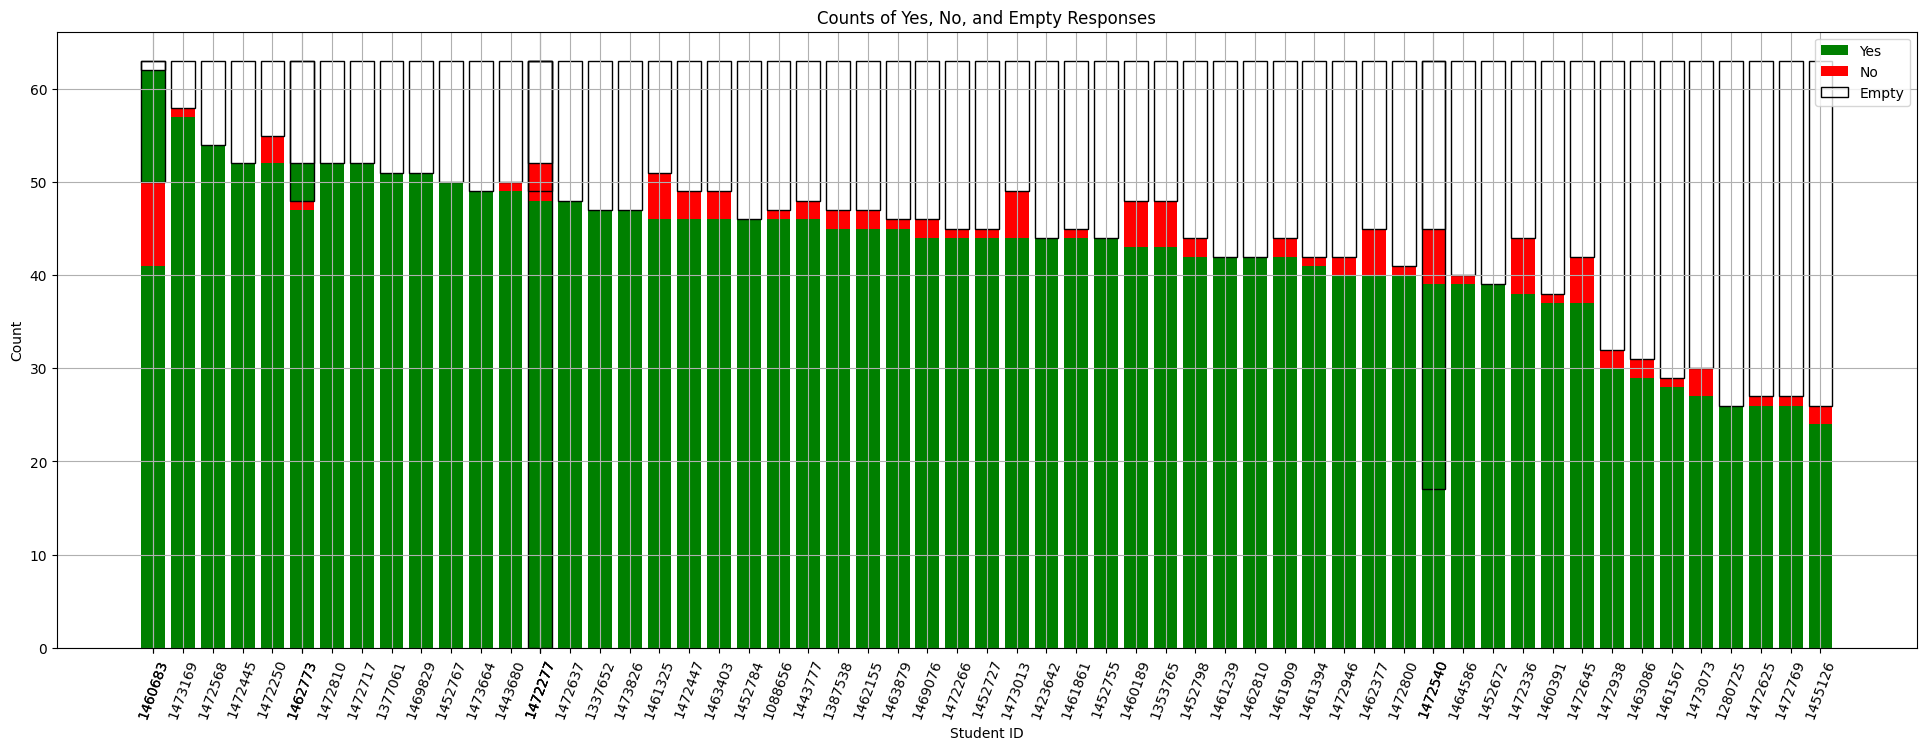

In [21]:
# Plotting
fig, ax = plt.subplots(figsize=(24, 8))
df = df.sort_values(by='Total Yes', ascending=False)
df['Student ID'] = df['Student ID'].astype(str)
# Plot the 'Yes' bars
ax.bar(df['Student ID'], df['Total Yes'], color='green', label='Yes')

# Plot the 'No' bars on top of the 'Yes' bars
ax.bar(df['Student ID'], df['Total No'], bottom=df['Total Yes'], color='red', label='No')

# Plot the 'Empty' bars on top of the 'No' bars
bars = ax.bar(df['Student ID'], df['Total Not Observed'], bottom=df['Total Yes'] + df['Total No'], edgecolor='black', fill=False, label='Empty')

# Add labels, title, and legend
ax.set_xlabel('Student ID')
ax.set_xticklabels(df[colId] ,rotation = 70)
ax.set_ylabel('Count')
ax.set_title('Counts of Yes, No, and Empty Responses')
ax.legend()
ax.grid(True)
# Display the plot
plt.xticks(df['Student ID'])  # Ensure Student IDs are used as X-axis labels
plt.show()


## Get missing students

In [22]:
iddf = pd.read_excel('2024 MDS Student List_v10.xlsx')
iddf = iddf[['Cohort', 'Student ID', 'First Name', 'Surname']]
iddfboh2 = iddf[iddf['Cohort'] == 'BOH2 (2024)']
onleaveStudents = [1634259]
iddfboh2.head()

,Cohort,Student ID,First Name,Surname
59,BOH2 (2024),1625702,Samreen,Gill
60,BOH2 (2024),1634259,Hilda,Petros
61,BOH2 (2024),1637288,Ivan,Yang
62,BOH2 (2024),1637313,Moe Myint,Tha
63,BOH2 (2024),1460683,Sitong,Chen


In [23]:
# check for students in iddf list that are not on studentIdList
allStudents = list(iddfboh2['Student ID'])
print('Total number of students: ', len(allStudents))
print('Students in the exam: ', len(studentIdList))
for student in allStudents:
    if student not in studentIdList:
        print(student, ',')


# check for students in studentIdList that are not in iddf list
print('Students in the exam list but not in student list: ')
for student in studentIdList:
    if student not in allStudents:
        print(student)

Total number of students:  63
Students in the exam:  57
1625702 ,
1634259 ,
1637288 ,
1637313 ,
1295910 ,
1419850 ,
Students in the exam list but not in student list: 


## Trash Code

In [24]:
# # Debug: Print the lengths of the columns after processing
# print("Length of columns after processing:")
# for col in df.columns:
#     print(f"{col}: {len(df[col])}")

# # Count 'Yes' and 'No' responses for each patient
# for col in colP1:
#     df[colP1Yes] += df[col].apply(lambda x: 1 if str(x).strip().lower() == 'Yes' else 0)
#     df[colP1No] += df[col].apply(lambda x: 1 if str(x).strip().lower() == 'No' else 0)
#     print(f"Processed column: {col}")

# for col in colP2:
#     df[colP2Yes] += df[col].apply(lambda x: 1 if str(x).strip().lower() == 'Yes' else 0)
#     df[colP2No] += df[col].apply(lambda x: 1 if str(x).strip().lower() == 'No' else 0)

# for col in colP3:
#     df[colP3Yes] += df[col].apply(lambda x: 1 if str(x).strip().lower() == 'Yes' else 0)
#     df[colP3No] += df[col].apply(lambda x: 1 if str(x).strip().lower() == 'No' else 0)

# # Calculate overall counts for each student
# df['Total Yes'] = df[colP1Yes] + df[colP2Yes] + df[colP3Yes]
# df['Total No'] = df[colP1No] + df[colP2No] + df[colP3No]